#  Spatial Navigation with Gemini 1.5's Long Context and Multimodal AI



## Introduction
In this notebook, we explore the capabilities of Google Gemini 1.5, particularly its revolutionary long-context window and context caching. With a context window that can process up to 2 million tokens, Gemini 1.5 opens up exciting possibilities for handling large multimodal data sets.

The goal of this notebook is to showcase Gemini 1.5’s ability to navigate complex environments, understand spatial relationships, and answer dynamic queries across both static images and continuous video. Through a series of increasing difficulty levels, we begin with a room tour video and progressively introduce longer and more intricate contexts, like a house tour video and even a drive video, we will demonstrate how Gemini 1.5 can handle multimodal inputs to perform spatial reasoning, object recognition, and route navigation

We'll be focusing on two primary use cases:
1. **Navigating a Apartment Landscape**: Using a short, 2-minute video of a luxury apartment landscape, cached by the model and asking navigational queries
2. **Navigating a Luxury House**: Using a long, 20-minute video of a luxury house, cached by the model and sending images from different parts of the house to navigate and understand the space.
2. **Drive Route Assistance**:A potential exploration of how the model can help navigate a scenic route by processing a long video of a drive and answering location-based questions based on a specific street view image.

## Inspiration behind the project

Inspired by a Threads post from Ethan Mollick, who shared how AI, like Claude, can interpret images in rich contextual ways (e.g., identifying a plane from a shot of its interior), I started thinking: What if AI could not only recognize objects, but entire environments? Could AI use images and videos from specific locations to answer real-time questions about space and navigation?

[Threads post](https://www.threads.net/@ethan_mollick/post/DBem6TxTh6Q/the-ability-of-multimodal-ai-to-understand-images-is-underratedi-just-took-these)
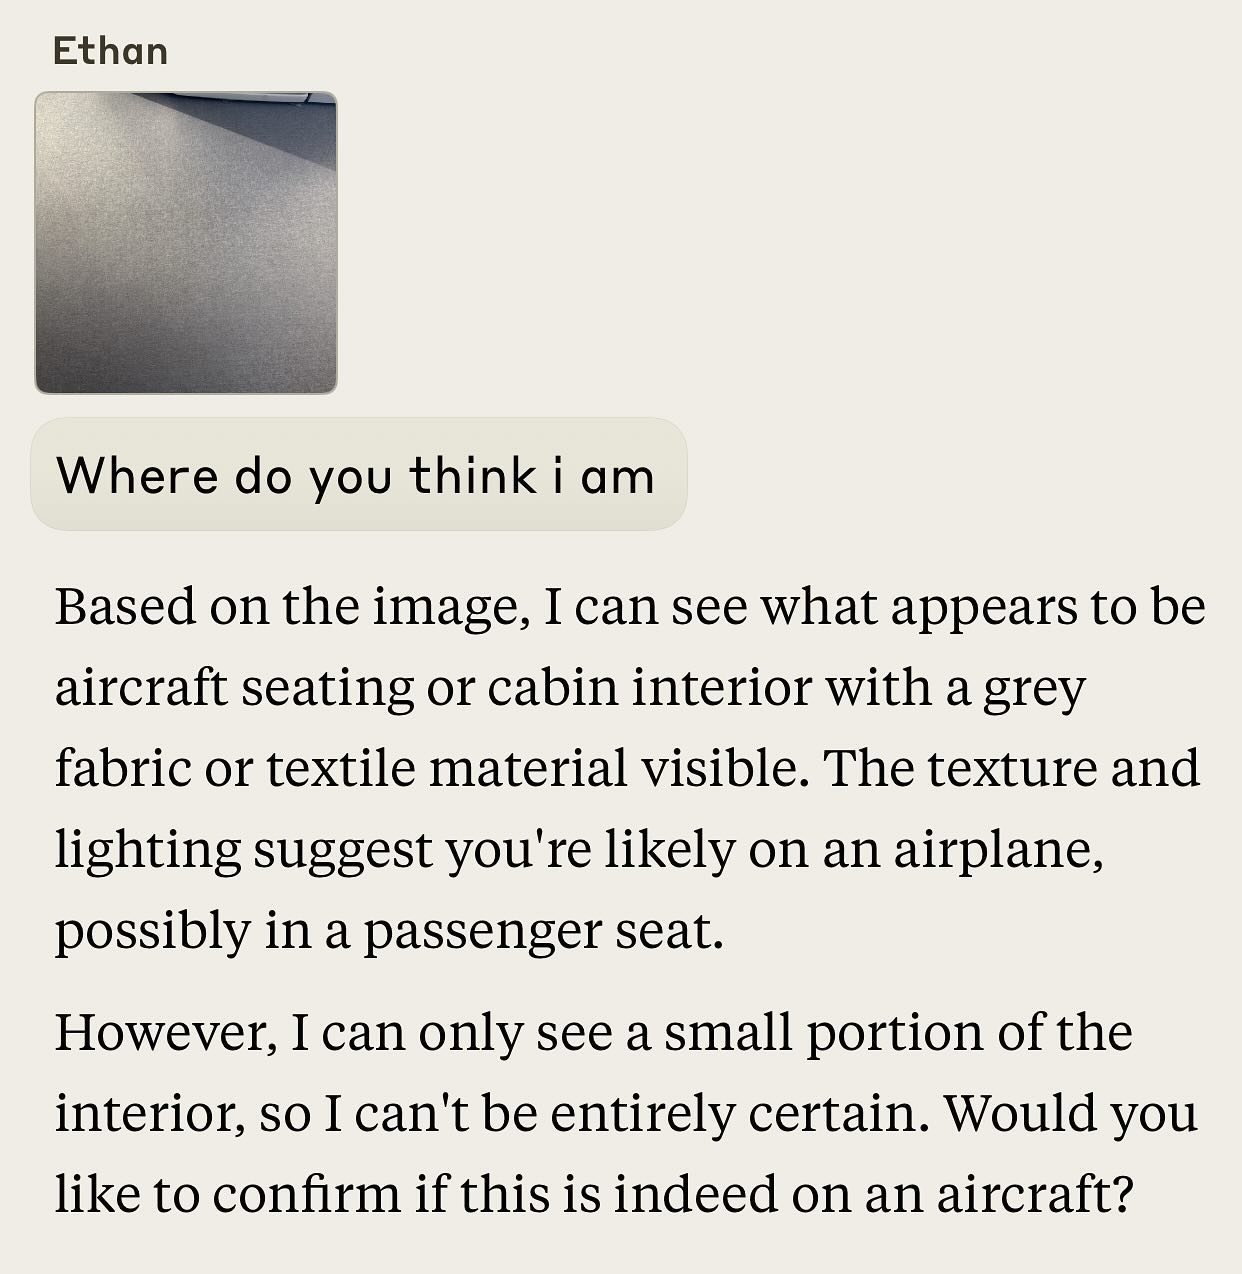
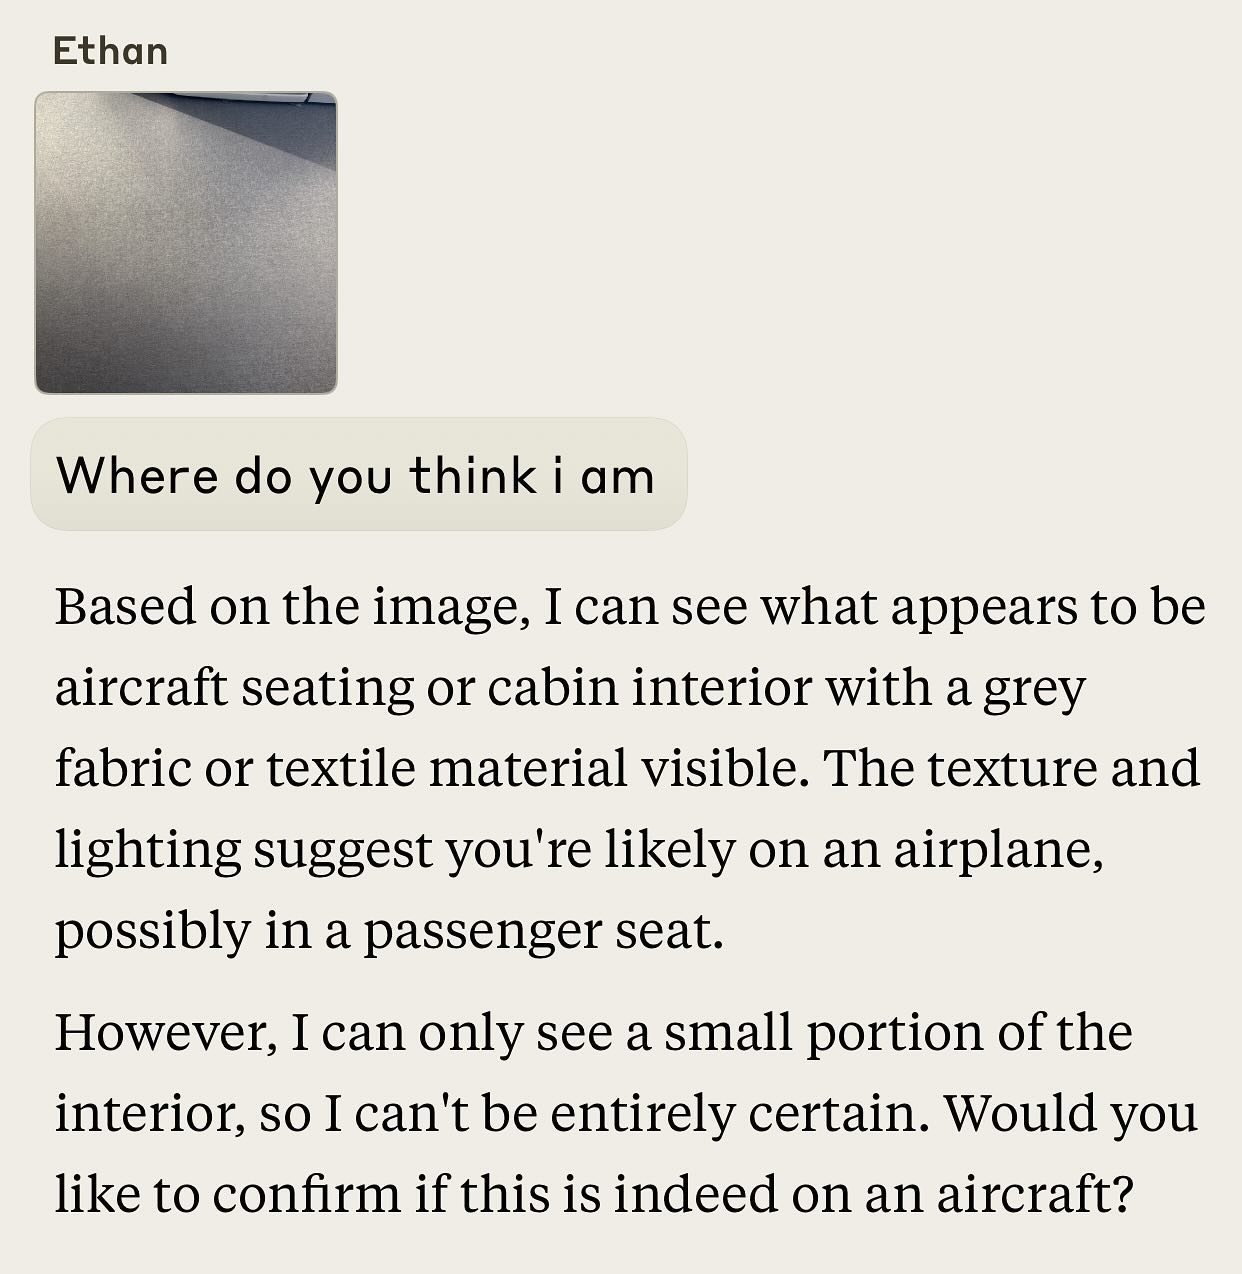

Ethan's post got me thinking: What if AI systems, by understanding context, could help us navigate complex environments, like rooms, houses, or even streets? By analyzing video tours or images from specific, personalized locations, Gemini 1.5 could provide dynamic, context-sensitive answers to questions like:

* "Where’s the nearest exit?"
* "What’s on the left side of my room?"
* "Where’s my bookshelf?"
  
This experiment explores how multimodal AI can understand and respond to questions about spaces (rooms, houses, roads) by interpreting both images and video, while leveraging long-context capabilities for spatial navigation and personalized guidance.

### **Multimodal AI for Contextual Navigation: Potential Use Cases**
By combining image recognition with long-context understanding, Gemini 1.5 has the potential to revolutionize the way we interact with physical spaces. Its long-context processing, which can handle up to 2 million tokens, allows the model to retain a large amount of environmental context from a video or sequence of images. This enables the AI to not only identify objects but to 
**build a coherent model of the environment as a whole.** andut **adapting to personalized spaces**

. Whether it's navigating your **home**, an **office**, or even large-scale public spaces, the potential for real-time, context-aware AI guidance is immense.

For example:
- **In your home**: The AI could provide answers like, "Where’s my charger?" or "Where is the book I left on the shelf?"
- **In a smart office**: "Where’s the nearest meeting room?" or "Which hallway leads to the printer?"
- **Public spaces like malls or airports**: AI could guide you with contextual answers like, "Your gate is to the left, but the nearest restroom is on the  spaces.


### **Why This Matters**
This project explores **how Gemini 1.5** can process video and images in a **multimodal context** to answer such spatial queries — and how it can understand environments not just through isolated snapshots, but by connecting **visual cues** with **long-term context** to understand environments in a more dynamic and holistic way. 

The potential applications are vast and transformative. From **home navigation systems** that help users find everyday objects, to **smart tourism** that offers real-time, context-aware guidance in public spaces like **malls** and **airports**. Additionally, this technology could revolutionize **autonomous vehicles**, providing seamless navigation with real-time contextual awareness of surrounding environments. Finally, in **virtual home assistants**, Gemini 1.5 could offer personalized, space-aware guidance — from helping you find the nearest charger to identifying objects in your home, all while adapting to changing contexts.



### Project Goals:
In this notebook, we’ll:

- **Test Gemini 1.5’s multimodal capabilities** by processing video and image data to answer location-based queries.
- Leverage **long-context** to retain spatial info across sequences, answering questions about rooms, houses, or scenic routes.
- Explore **context caching** for faster, cost-efficient real-time navigation.

We'll start with a video tour of a room and scale up to a luxury house tour, testing Gemini 1.5’s understanding of layout, objects, and spatial relationships.

### Pushing the Limits of Spatial Recognition
**Why Long Context?**
Spatial tasks require processing large amounts of data. Systems need to maintain awareness of objects, their positions, and the user's movement over time. Gemini 1.5’s long-context ability (millions of tokens) helps:

- Comprehend complex scenes by tracking objects and their locations across time.
- Provide spatially relevant answers, like “Where’s the nearest exit?” even after long video sequences.
- Offer **real-time navigation assistance** with unprecedented understanding.

**Context Caching for Real-Time Performance:**
Context caching enables quicker access to past data, making real-time queries faster. For example, when asked, “Where’s the closet?” or “What’s ahead on this path?”, the AI can instantly recall key information from video frames, improving response time without reprocessing the entire sequence.


## Step 1: Starting with a Apartment landscape Tour Video - Demonstrating Spatial Queries with Gemini 1.5
To start, we use a 2-minute apartment landscape tour video and test Gemini 1.5’s ability to process spatial queries based on visual context. We perform contextual queries like:

* “Where is the gym?”
* “How do I get to the front entrance?”

This demonstrates how Gemini 1.5 can extract relevant spatial features from the video and then apply its long-context capabilities to integrate the visual context with text-based queries.

We will analyze how Gemini 1.5 integrates both the video context and the still image to answer these spatial queries accurately and with contextual relevance.

---


In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/apartment-landscape-tour/AQMi-Q9G6iGdWoYUV4T4UT9GXLt3g9z4vWz322nTd1Pu7fVdyo-VuJvxwlIB0Vx_L9uyRA5MUJSpiWszu28m3f9m.mp4
/kaggle/input/room-tour/HnVideoEditor_2024_12_01_195420822.mp4
/kaggle/input/mansion-tour-video/kitchen cabinets.png
/kaggle/input/mansion-tour-video/mansion tour video.mp4
/kaggle/input/mansion-tour-video/front door lock.png
/kaggle/input/test-apartment-landscape/pic1.png
/kaggle/input/long-context-spatial-test/apt image 2.png
/kaggle/input/long-context-spatial-test/route 1 test.png
/kaggle/input/long-context-spatial-test/route 2 test.png
/kaggle/input/long-context-spatial-test/apt image 1.png
/kaggle/input/gemini-long-context/submission_instructions.txt


In [2]:
import os
from kaggle_secrets import UserSecretsClient
import google.generativeai as genai
from google.generativeai import caching
import datetime
import time

# Access the stored secret (API Key) from Kaggle secrets
user_secrets = UserSecretsClient()
api_key = user_secrets.get_secret("GEMINI_API_KEY")

# Configure the Gemini API with the API Key
genai.configure(api_key=api_key)



In [3]:
# Test API
try:
    model = genai.GenerativeModel(model_name='gemini-1.5-flash-001')
    response = model.generate_content("Hi Gemini!")
    
    print(f"API Key Test Successful: {response.text}")
except Exception as e:
    print(f"API Key Test Failed: {str(e)}")

API Key Test Successful: Hi there! What can I do for you today? 



In [4]:
# Upload the video using the Files API
video_file = genai.upload_file(path='/kaggle/input/moneebah-gemini-competition/AQMi-Q9G6iGdWoYUV4T4UT9GXLt3g9z4vWz322nTd1Pu7fVdyo-VuJvxwlIB0Vx_L9uyRA5MUJSpiWszu28m3f9m.mp4')

# Wait until the video file is processed
while video_file.state.name == 'PROCESSING':
    print('Waiting for video to be processed...')
    time.sleep(2)
    video_file = genai.get_file(video_file.name)

print(f'Video processing complete: {video_file.uri}')


Waiting for video to be processed...
Waiting for video to be processed...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/i7cex1ul13q5


In [5]:
# Create a cache with a 5-minute TTL (Time To Live)
cache = caching.CachedContent.create(
    model='models/gemini-1.5-flash-001',  # Use the appropriate model
    display_name='landscape_video_analysis',  # Display name for the cache
    system_instruction=(
        'You are an expert video analyzer, and know how to navigate to different parts of the locations shown in the video and your job is to answer '
        'the user\'s navigational queries and other questions based on the video file you have access to in a very detailed and accurate manner.'
    ),
    contents=[video_file],
    ttl=datetime.timedelta(minutes=5),  # Cache expires after 5 minutes
)

print(f'Cache created: {cache.display_name}, expires at {cache.expire_time}')


Cache created: landscape_video_analysis, expires at 2024-12-01 22:10:34.239759+00:00


## Testing with Queries

### Test 1

In [6]:
# Construct the GenerativeModel from the cached content
model = genai.GenerativeModel.from_cached_content(cached_content=cache)

# Query the model
response = model.generate_content([
    'How do I get to the gym.'
])

# Print the response and token usage info
print(f"Response: {response.text}")
print(f"Token usage metadata: {response.usage_metadata}")


Response: To get to the gym, you can first walk through the entrance to the building. Then, you can either take the stairs or the elevator to the second floor. The gym is located on the second floor. 

Token usage metadata: prompt_token_count: 43134
candidates_token_count: 42
total_token_count: 43176
cached_content_token_count: 43125



### Test 2

In [7]:
# Query the model
response = model.generate_content([
    'How many games can I play.'
])

# Print the response and token usage info
print(f"Response: {response.text}")
print(f"Token usage metadata: {response.usage_metadata}")


Response: The video shows a club house with an indoor games area. You can play table tennis, snooker, and other indoor games. 

Token usage metadata: prompt_token_count: 43133
candidates_token_count: 26
total_token_count: 43159
cached_content_token_count: 43125



### Test 3 - with an image

In [8]:
from PIL import Image
img = Image.open('/kaggle/input/moneebah-gemini-competition/pic1.png')

In [9]:
# Query
query = 'Where am I and how do I get to the fountain?'

# Assuming you have already configured the model and API key
response = model.generate_content([query, img])

# Print the response and token usage info
print(f"Response: {response.text}")
print(f"Token usage metadata: {response.usage_metadata}")

Response: You are standing at the base of a set of stairs outside an apartment building.  To get to the fountain, you would need to walk up the stairs and then turn left. The fountain is visible in the distance. 
Token usage metadata: prompt_token_count: 43396
candidates_token_count: 44
total_token_count: 43440
cached_content_token_count: 43125



The directions are all correct and according to the video allowing for easy navigation

# Step 2: Scaling Up - Mansion Tour Video and Complex Spatial Queries
Now, let's scale up with a **Mansion tour video** that spans around 20 minutes. With its **25,000-token context**, Gemini 1.5 is able to track multi-room layouts and provide accurate spatial reasoning over a **longer video context**.

This step demonstrates Gemini 1.5's ability to track larger spaces, multi-room layouts, and answer more complex queries based on the entire tour, including temporal changes (e.g., moving between rooms).

Ask spatial queries based on the tour:
* “How do I get to the front door from here?”
* “Where am I right now?”
* "What is this right here?"
* “Can you help me get to the kitchen?”

These queries require Gemini 1.5 to process and maintain spatial coherence over a longer sequence of video frames and text-based inputs. The model’s ability to answer these questions highlights the effectiveness of its long-context processing capabilities in practical applications.

Insights:
Gemini 1.5’s 25,000-token context allows it to track the entire house tour and maintain an understanding of the spatial relationships between rooms and objects.
The model also integrates visual reasoning with textual input to provide highly accurate and contextually-aware answers to complex spatial queries.

In [10]:
# List all the existing caches (this gives you metadata about them)
for c in caching.CachedContent.list():
    print(c)


CachedContent(
    name='cachedContents/fvzuwrggs2k3',
    model='models/gemini-1.5-flash-001',
    display_name='landscape_video_analysis',
    usage_metadata={
        'total_token_count': 43125,
    },
    create_time=2024-12-01 22:05:35.452415+00:00,
    update_time=2024-12-01 22:05:35.452415+00:00,
    expire_time=2024-12-01 22:10:34.239759+00:00
)


In [11]:
cache.delete()

In [12]:
# Upload the video using the Files API
video_file = genai.upload_file(path='/kaggle/input/moneebah-gemini-competition/mansion tour video.mp4')

# Wait until the video file is processed
while video_file.state.name == 'PROCESSING':
    print('Waiting for video to be processed...')
    time.sleep(2)
    video_file = genai.get_file(video_file.name)

print(f'Video processing complete: {video_file.uri}')

Waiting for video to be processed...
Waiting for video to be processed...
Waiting for video to be processed...
Waiting for video to be processed...
Waiting for video to be processed...
Waiting for video to be processed...
Waiting for video to be processed...
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/154hq55smfbz


In [13]:
# Create a cache with a 5-minute TTL (Time To Live)
cache_mansion = caching.CachedContent.create(
    model='models/gemini-1.5-flash-001',  # Use the appropriate model
    display_name='mansion_video_analysis',  # Display name for the cache
    system_instruction=(
        'You are an expert video analyzer, and know how to navigate to different parts of the locations shown in the video and your job is to answer '
        'the user\'s navigational queries and other questions based on the video file you have access to in a very detailed and accurate manner.'
    ),
    contents=[video_file],
    ttl=datetime.timedelta(minutes=5),  # Cache expires after 5 minutes
)

print(f'Cache created: {cache_mansion.display_name}, expires at {cache_mansion.expire_time}')


Cache created: mansion_video_analysis, expires at 2024-12-01 22:11:17.654547+00:00


## Testing with queries

### Test 1

In [14]:
# Construct the GenerativeModel from the cached content
model = genai.GenerativeModel.from_cached_content(cached_content=cache_mansion)

# Query the model
response = model.generate_content([
    'How do I get to the gym.'
])

# Print the response and token usage info
print(f"Response: {response.text}")
print(f"Token usage metadata: {response.usage_metadata}")

Response: To get to the gym you have to go down the stairs that are on the right side of the entrance hallway, to the basement level. The gym is behind the sliding doors. 
Token usage metadata: prompt_token_count: 326334
candidates_token_count: 36
total_token_count: 326370
cached_content_token_count: 326325



### Test 2  with image

Apartment front lock - this wasnt talked about in the video but briefly shown in the start when the man enters the mansion

In [15]:
apt_1_img = Image.open('/kaggle/input/moneebah-gemini-competition/apt image 1.png')

In [16]:
# Query
query = 'What is this?'

# Assuming you have already configured the model and API key
response = model.generate_content([query, apt_1_img])

# Print the response and token usage info
print(f"Response: {response.text}")
print(f"Token usage metadata: {response.usage_metadata}")

Response: This is an elevator control panel. It has buttons for going up and down. 
Token usage metadata: prompt_token_count: 326588
candidates_token_count: 16
total_token_count: 326604
cached_content_token_count: 326325



Incorrect! This was at the main entrance and is NOT an elevator switch. Its understandable that Gemini didnt detect this because there was no mention of it in the video it just appeared for a few seconds in the start before the man enters the mansion

### Test 3 with image

This shows the kitchen shelves

In [17]:
apt_2_img = Image.open('/kaggle/input/moneebah-gemini-competition/apt image 2.png')

In [18]:
# Query
query = 'Where am I? and how do I get to the pool from here?'

# Assuming you have already configured the model and API key
response = model.generate_content([query, apt_2_img])

# Print the response and token usage info
print(f"Response: {response.text}")
print(f"Token usage metadata: {response.usage_metadata}")

Response: You are in the kitchen of the villa.  You can see a large island with a sink on the left side of the screen. To get to the pool, walk towards the  glass doors on the right side of the screen. 

Token usage metadata: prompt_token_count: 326599
candidates_token_count: 47
total_token_count: 326646
cached_content_token_count: 326325



## Step 3: Pushing the Limits - Imagining a 40-Minute Drive Video and Long-Context Exploration

Although processing a **40-minute driving video** is not feasible for me as the 20 minute video itself did not cache due to net and resource issues, we can still understand how **Gemini 1.5** would track the journey, process dynamic data, and answer **temporal and spatial queries** along the route.

### Workflow
Consider using this video of a 40 minute drive Srom Grindelwald to Lauterbrunnen.

[From Grindelwald to Lauterbrunnen](https://www.youtube.com/watch?v=b-WViLMs_4c)

Caching this and then querying the model on directions would lead to some interesting findings especially if we query it with certain snapshots from google street view of locations that appeared in the video and then asking how we can go to another location

## **Example** 
At around the 38:30 minute mark in the video, you can see a white building with blue windows and a sign reading "Jungfrau Restaurant." The idea here is to use Google Street View to navigate to this exact location, take a few steps back from it, and capture an image of the scene. This image can then be sent to Google Gemini with the following query
'Hi im here, help me get to jungfrau restaurant'

This query could be quite interesting as it combines both an image and a clear instruction on what you're looking for, which would test the model's ability to understand and assist with physical location-based navigation in real-time.


Image from streetview to send to gemini and ask to 'navigate to jungfrau restaurant'


mansion_tour_video = '/kaggle/input/mansion-tour-video/mansion tour video.mp4'

video_file = genai.upload_file(path=mansion_tour_video)

while video_file.state.name == 'PROCESSING':
    print('Waiting for video to be processed...')
    time.sleep(2)
    video_file = genai.get_file(video_file.name)

print(f'Video processing complete: {video_file.uri}')

cache_drive = caching.CachedContent.create(
    model='models/gemini-1.5-flash-001',  # Use the appropriate model
    display_name='drive_video_analysis',  # Display name for the cache
    system_instruction=(
        'You are an expert video analyzer, and know how to navigate to different parts of the locations shown in the video and your job is to answer '
        'the user\'s navigational queries and other questions based on the video file you have access to in a very detailed and accurate manner.'
    ),
    contents=[video_file],
    ttl=datetime.timedelta(minutes=5),  # Cache expires after 5 minutes
)

print(f'Cache created: {cache.display_name}, expires at {cache.expire_time}')


model = genai.GenerativeModel.from_cached_content(cached_content=cache_drive)

response = model.generate_content([
    'How do I get to the gym.'
])

print(f"Response: {response.text}")
print(f"Token usage metadata: {response.usage_metadata}")


route_1_image_path = '/kaggle/input/long-context-spatial-test/route 1 test.png'  # Replace with your local image path
route_1_img = Image.open(route_1_image_path)

query = 'Hi im here, help me get to jungfrau restaurant'

response = model.generate_content([query, apt_2_img])

print(f"Response: {response.text}")
print(f"Token usage metadata: {response.usage_metadata}")


In [20]:
# List all the existing caches (this gives you metadata about them)
for c in caching.CachedContent.list():
    print(c)
    c.delete()


CachedContent(
    name='cachedContents/ajpyon4aygvs',
    model='models/gemini-1.5-flash-001',
    display_name='mansion_video_analysis',
    usage_metadata={
        'total_token_count': 326325,
    },
    create_time=2024-12-01 22:06:25.110255+00:00,
    update_time=2024-12-01 22:06:25.110255+00:00,
    expire_time=2024-12-01 22:11:17.654547+00:00
)
